## NILMTK Rapid Experimentation API

 This notebook demonstrates the use of NILMTK's Experiment API, a new interface to NILMTK that allows NILMTK users to focus on what experiments to run rather than on the code needed to run those experiments.

It is important to note that delivering so much flexibility to the user requires the user to be somewhat familiar with the dataset, but this part of the process is supported by NILMTK, as data exploration is simple and well documented. Let's start with a very simple experiment to demonstrate the use of the API for multiple devices in a minimal use case. This experiment shows how the user can select the devices in the dataset on which the disaggregation is to be performed.

We import all libraries

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams
from nilmtk.utils import print_dict
from nilmtk import DataSet
import warnings
warnings. filterwarnings("ignore")
plt.style.use('bmh')

Import of the libraries of the different disaggregation algorithms.

In [3]:
from nilmtk.disaggregate import Hart85
from nilmtk.disaggregate import Mean
from nilmtk.disaggregate import CO
from nilmtk.disaggregate import FHMMExact


# Dataset with the learned model

We load the dataset of the previously trained model using the OMPM v1 which uses 5 applications plus the aggregate.

In [4]:
#dataset de referencia 
ompm = DataSet('ualm2.h5')
print_dict(ompm.metadata)  #metadatos del dataset

We analyse the time-dates of the dataset

In [5]:
elec = ompm.buildings[1].elec #todos los medidores del dataset
elec.get_timeframe()

TimeFrame(start='2023-02-24 14:47:10.508000+01:00', end='2023-02-24 20:03:54.554000+01:00', empty=False)

# Dataset with only the aggregate signal

We need a new converter that generates the new dataset with the data from the OMPM with the aggregate measurements.

In [ ]:
from nilmtk.dataset_converters import convert_ualm22
convert_ualm22('./data/ozm3/', 'ualm3.h5','2023-05-14','2023-05-14')
#dataset de referencia 

We load the dataset with measurement data only from the aggregate.

In [6]:
# Paso 2: Cargar el segundo dataset
second_dataset_path = 'ualm3.h5'
ompm2 = DataSet(second_dataset_path)


# DISAGGREGATION FROM A PREVIOUSLY TAUGHT MODEL AND A DATASET THAT ONLY HAS THE AGGREGATE

Here you can change the start and end dates of your test data set and also, we enter the values of the different parameters in the dictionary. Since we need several appliances, we enter the names of all required appliances in the parameter ‘appliances’. We also mention site_only is true because we want to disaggregate the site meter data only without any comparison with the sub-meter data.

# EXPERIMENT 1 (COMBINATORIAL ALGORITHM)

In [7]:
experiment1 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 30,
    'appliances': [2,3,4,5,6],
   # 'appliances': ['air conditioner','fridge','washing machine','clothes iron','television'],
    'methods': {"CO":CO({})},#"FHMM":FHMMExact({'num_of_states':2}),'Mean':Mean({}),'Hart':Hart85({})},
    'site_only' : True,
  'train': {    
    'datasets': {
        'DSUAL': {
            'path': 'ualm2.h5',
            'buildings': {
                1: {
                    'start_time': '2023-02-24 14:47:10', 
                    'end_time': '2023-02-24 20:03:54'
                    }
                }                
            }
        }
    },
  'test': {
    'datasets': {
        'DSUAL': {
            'path': 'ualm3.h5',
            'buildings': {
                1: {
                    'start_time': '2023-05-13 17:22:02',
                    'end_time': '2023-05-13 23:43:15'
                    }
                }
            }
        },
        'metrics':['rmse']
    }
}


In [8]:
from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")


Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : CO
...............CO disaggregate_chunk running.............
fin disaggregate_chunkd for '6'


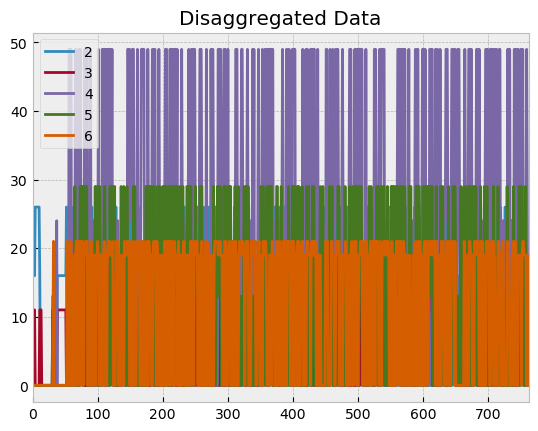

In [9]:
api_results_experiment_1 = API(experiment1)


2=Fryer 3=lED Lamp 4=Incandescent lamp 5=Laptop Computer 6=Fan



## Obtaining the prediction data frame 

In [10]:
df = (api_results_experiment_1.pred_overall['CO'])

In [11]:
df

,2,3,4,5,6
0,26.0,0.0,0.0,0.0,0.0
1,26.0,0.0,0.0,0.0,0.0
2,16.0,11.0,0.0,0.0,0.0
3,16.0,11.0,0.0,0.0,0.0
4,26.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
758,0.0,19.0,24.0,13.0,19.0
759,0.0,19.0,49.0,0.0,0.0
760,0.0,0.0,24.0,0.0,19.0
761,0.0,0.0,0.0,0.0,0.0


# EXPERIMENT 2 (CO AND MEAN ALGORITHMS)

In [12]:
experiment2 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 30,
    'appliances': [2,3,4,5,6],
   # 'appliances': ['air conditioner','fridge','washing machine','clothes iron','television'],
    'methods': {"CO":CO({}),'Mean':Mean({})},#"FHMM":FHMMExact({'num_of_states':2}),'Mean':Mean({}),'Hart':Hart85({})},
    'site_only' : True,
  'train': {    
    'datasets': {
        'DSUAL': {
            'path': 'ualm2.h5',
            'buildings': {
                1: {
                    'start_time': '2023-02-24 14:47:10', 
                    'end_time': '2023-02-24 20:03:54'
                    }
                }                
            }
        }
    },
  'test': {
    'datasets': {
        'DSUAL': {
            'path': 'ualm3.h5',
            'buildings': {
                1: {
                    'start_time': '2023-05-13 17:22:02',
                    'end_time': '2023-05-13 23:43:15'
                    }
                }
            }
        },
        'metrics':['rmse']
    }
}


Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : CO
...............CO disaggregate_chunk running.............
fin disaggregate_chunkd for '6'
Generating predictions for : Mean


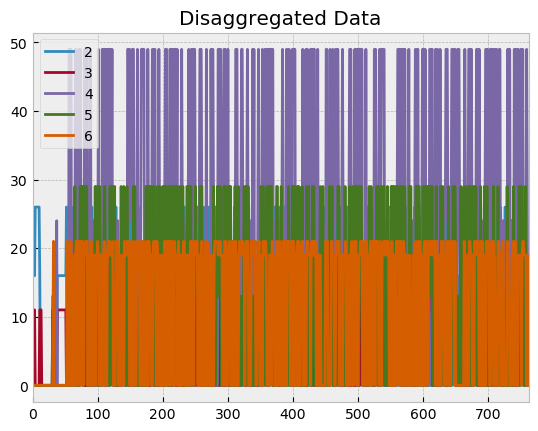

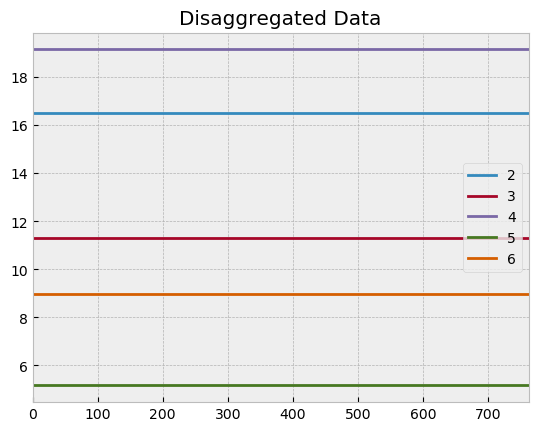

In [13]:
api_results_experiment_1 = API(experiment2)

2=Fryer 3=lED Lamp 4=Incandescent lamp 5=Laptop Computer 6=Fan

# EXPERIMENT 3 (ALGORITMS CO , MEAN Y HART)

## Combinatorial Optimisation

In [27]:
experiment3 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 30,
    'appliances': [2,3,4,5,6],
   # 'appliances': ['air conditioner','fridge','washing machine','clothes iron','television'],
    'methods': {"CO":CO({})},#"FHMM":FHMMExact({'num_of_states':2}),'Mean':Mean({}),'Hart':Hart85({})},
    'train': {    
    'datasets': {
        'DSUAL': {
            'path': 'ualm2.h5',
            'buildings': {
                1: {
                    'start_time': '2023-02-24 14:47:10', 
                    'end_time': '2023-02-24 19:03:54'
                    }
                }                
            }
        }
    },
  'test': {
    'datasets': {
        'DSUAL': {
            'path': 'ualm2.h5',
            'buildings': {
                1: {
                    'start_time': '2023-02-24 19:03:54', 
                    'end_time': '2023-02-24 20:03:54'
                    }
                }
            }
        },
        'metrics':['rmse']
    }
}

In [28]:
api_results_experiment_1 = API(experiment3)

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : CO
...............CO disaggregate_chunk running.............
fin disaggregate_chunkd for '6'
............  rmse  ..............
          CO
2  15.086589
3  10.649859
4  18.564632
5   9.380391
6   9.828796


Method Mean

In [30]:
experiment3 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 30,
    'appliances': [2,3,4,5,6],
   # 'appliances': ['air conditioner','fridge','washing machine','clothes iron','television'],
     'methods': {'Mean':Mean({})},
    'train': {    
    'datasets': {
        'DSUAL': {
            'path': 'ualm2.h5',
            'buildings': {
                1: {
                    'start_time': '2023-02-24 14:47:10', 
                    'end_time': '2023-02-24 19:03:54'
                    }
                }                
            }
        }
    },
  'test': {
    'datasets': {
        'DSUAL': {
            'path': 'ualm2.h5',
            'buildings': {
                1: {
                    'start_time': '2023-02-24 19:03:54', 
                    'end_time': '2023-02-24 20:03:54'
                    }
                }
            }
        },
        'metrics':['rmse']
    }
}

In [31]:
api_results_experiment_1 = API(experiment3)


Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Mean
............  rmse  ..............
        Mean
2  12.458803
3   8.185964
4  28.226568
5   6.375486
6   9.971358


## Hart85

In [32]:
experiment3 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 30,
    'appliances': [2,3,4,5,6],
   # 'appliances': ['air conditioner','fridge','washing machine','clothes iron','television'],
    'methods': {'Hart':Hart85({})},
    'train': {    
    'datasets': {
        'DSUAL': {
            'path': 'ualm2.h5',
            'buildings': {
                1: {
                    'start_time': '2023-02-24 14:47:10', 
                    'end_time': '2023-02-24 19:03:54'
                    }
                }                
            }
        }
    },
  'test': {
    'datasets': {
        'DSUAL': {
            'path': 'ualm2.h5',
            'buildings': {
                1: {
                    'start_time': '2023-02-24 19:03:54', 
                    'end_time': '2023-02-24 20:03:54'
                    }
                }
            }
        },
        'metrics':['rmse']
    }
}

In [33]:
api_results_experiment_1 = API(experiment3)

Started training for  Hart85
Joint training for  Hart85
............... Loading Data for training ...................
Loading data for  DSUAL  dataset
Loading building ...  1
Dropping missing values
...........................Hart_85 Partial Fit Running...............
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
.........................Hart_85 Partial Fit End....................


ValueError: Wrong number of items passed 4, placement implies 0

## FHMMExact

In [34]:
experiment3 = {
    'power': {'mains': ['active'],'appliance': ['active']},
    'sample_rate': 30,
    'appliances': [2,3,4,5,6],
   # 'appliances': ['air conditioner','fridge','washing machine','clothes iron','television'],
    'methods': {'Hart':Hart85({})},
    'train': {    
    'datasets': {
        'DSUAL': {
            'path': 'ualm2.h5',
            'buildings': {
                1: {
                    'start_time': '2023-02-24 14:47:10', 
                    'end_time': '2023-02-24 19:03:54'
                    }
                }                
            }
        }
    },
  'test': {
    'datasets': {
        'DSUAL': {
            'path': 'ualm2.h5',
            'buildings': {
                1: {
                    'start_time': '2023-02-24 19:03:54', 
                    'end_time': '2023-02-24 20:03:54'
                    }
                }
            }
        },
        'metrics':['rmse']
    }
}

In [35]:
api_results_experiment_1 = API(experiment3)

Started training for  Hart85
Joint training for  Hart85
............... Loading Data for training ...................
Loading data for  DSUAL  dataset
Loading building ...  1
Dropping missing values
...........................Hart_85 Partial Fit Running...............
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
.........................Hart_85 Partial Fit End....................


ValueError: Wrong number of items passed 4, placement implies 0